# Test and Parameter Estimation

># 1. Terms

* Distribution Test
  * Normality Test
* Parameter Test
* Parameter Estimation
  * MSE(Minimum Squared Error)
  * MLE(Maximum Likelihood Estimation)
  * Bayesian Estimation

># 2. Test

### Test Methodology

* 1) Assume that the data is generated from a fixed probability distribution 
* 2) Assume that the parameter of this distribution possesses certain value (**null hypothesis**)
* 3) Calculate **test statistics distribution**
* 4) If the **p-value** is smaller than the significance level $\rightarrow$ **reject** the null hypothesis
* 5) If the **p-value** is larger than the significance level $\rightarrow$ **accept** the null hypothesis

### Null Hypothesis & Alternative Hypothesis
* Two-tailed testing

$$ H_0: \theta = 0 ,\;\;\; H_a: \theta \neq 0 $$

* One-tailed testing

$$ H_0: \theta = 0, \;\;\; H_a: \theta > 0 $$

$$ H_0: \theta = 0 ,\;\;\; H_a: \theta < 0 $$

### Test Statistics
* A quantity derived from the sample
$$ t = f(x_1, x_2, \ldots, x_N) $$

### Examples of Test Statistics
* **1) Bernoulli distribution**
$$ x \sim \text{Bern}  \;\; \rightarrow \;\; t = \sum x \sim \text{Bin} $$
$$$$
* **2) Categorial distribution**
$$ x \sim \text{Cat}  \;\; \rightarrow \;\; t = \sum x \sim \text{Mul} $$
$$$$
* **3) Normal distribution with known variance**
$$
x \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; z = \dfrac{m-\mu}{\frac{\sigma}{\sqrt{N}}} \sim \mathcal{N}(z;0,1)
$$
  * $m$: Sample Average
$$
m = \dfrac{1}{N}\sum_{i=1}^{N} x_i
$$
$$$$
* **4) Normal distribution with unknown variance**
$$
x \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; t = \dfrac{m-\mu}{\frac{s}{\sqrt{N}}} \sim t(t;0,1,N-1)
$$
$$$$
  * $m$: Sample Average
$$
m = \dfrac{1}{N}\sum_{i=1}^{N} x_i
$$
$$$$
  * $s^2$: Sample Variance
$$
s^2 = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m)^2
$$
$$$$
* **5) Test on Variance Parameter**
$$
x \sim \mathcal{N}(\mu, \sigma^2) \;\; \rightarrow \;\; t = (N-1)\dfrac{s^2}{\sigma^2} \sim \chi^2 (t;N-1)
$$

### p-value
* **1) Two-tail p-value**
$$ H_0: \theta = 0 ,\;\;\; H_a: \theta \neq 0 $$
$$$$
$$ P( t_2 < T \text{ or } T < t_1 | H_0 )  = F(t_1) + (1 - F(t_2))$$
$$$$
* **2) Right-tail p-value**
$$ H_0: \theta = 0, \;\;\; H_a: \theta > 0 $$
$$$$
$$ P( T > t | H_0 ) = 1 - F(t)  $$
$$$$
* **3) Left-tail p-value**
$$ H_0: \theta = 0, \;\;\; H_a: \theta < 0 $$
$$$$
$$ P( T < t | H_0 ) = F(t)$$
$$$$

># 3. Test using Scipy

**Test available in SciPy**
* 이항 검정 (Binomial test)
* 카이 제곱 검정 (Chi-square test)
* 단일 표본 z-검정 (One-sample z-test)
* 단일 표본 t-검정 (One-sample t-test)
* 독립 표본 t-검정 (Independent-two-sample t-test)
* 대응 표본 t-검정 (Paired-two-sample t-test)
* 분산 검정 (Chi squared variance test)
* 등분산 검정 (Equal-variance test)
* 정규성 검정 (Normality test)

### Binomial test
* [scipy.stats.binom_test](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html)

$N=10$, $\theta_0=0.5$

In [55]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [3]:
sp.stats.binom_test(x=7, n=10, p=0.5)

0.34374999999999989

### Chi-square test

* Also referred to as the **goodness of fit** test
* Test statistics: $\theta=(\theta_1, \ldots, \theta_K)$
* Null hypothesis: $\theta = \left(\frac{1}{K}, \ldots, \frac{1}{K} \right)$
* [scipy.stats.chisquare](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)

$N=10$, $\theta_0=(0.25, 0.25, 0.25, 0.25)$

In [61]:
N = 10
K = 4
theta_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [62]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

### One-sample z-test

* Normal distribution with known variance $\sigma^2$
* [scipy.stats.norm](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

$N=10$, $\mu_0=0$

In [49]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [47]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [48]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

### Type 1 Error
* Null hypothesis is true / but rejected

데이터 갯수 $N=100$, 실제 모수 $\mu_0=0$인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

### One-sample t-test

* Expectation value of normal distribution
* [scipy.stats.ttest_1samp](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

$N=10$, $\mu_0=0$

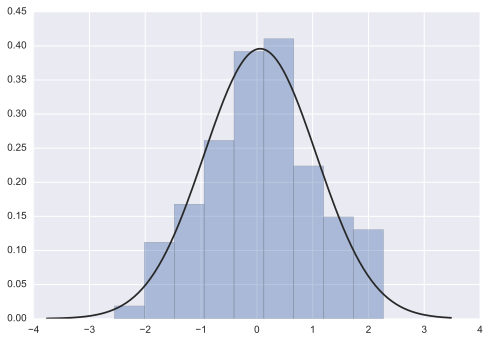

In [90]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [85]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.59042834028516977, pvalue=0.55624891586946745)

### Independent-two-sample t-test

* Test if the expectation values of two normal distributions are same
* `equal_var`: True for equal variance
* [more](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

$\mu_1 = 0$, $\mu_2 = 0.5$, $\sigma_1 = \sigma_2 = 1$, $N_1=N_2=10$

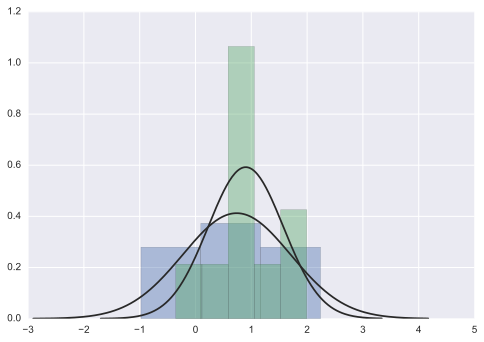

In [99]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [100]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

### Type 2 Error
* Null hypothesis is false / but accepted

### Paired-two-sample t-test

* When two samples for independent t-test are paired
* [scipy.stats.ttest_rel](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

$\mu_1 = 0$, $\mu_2 = 0.5$, $N = 5$

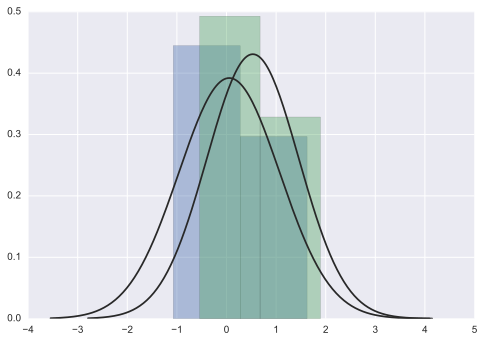

In [119]:
N = 5
mu_1 = 0
mu_2 = 0.5
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [120]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-7.1723380661732756, pvalue=0.0020008849290622677)

### Chi-Square Test for the Variance

* Use the fact that the normalized sample variance of a normal distribution follows the chi-square distribution.

In [134]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

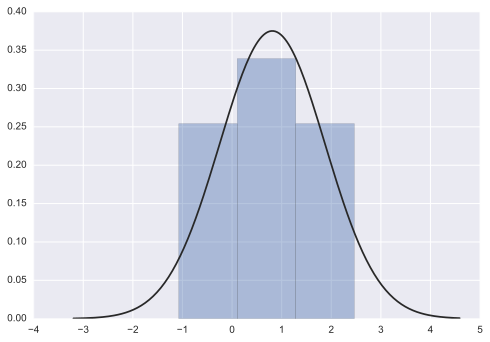

1.0637871321863899

In [153]:
N = 10
mu_0 = 0
sigma_0 = 1.1
np.random.seed(0)
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [154]:
chi2var_test(x)

(11.316430626053437, 0.25464123584764531)

### Equal-variance test

* scipy.stats.bartlett
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
* scipy.stats.fligner
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
* scipy.stats.levene
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html   

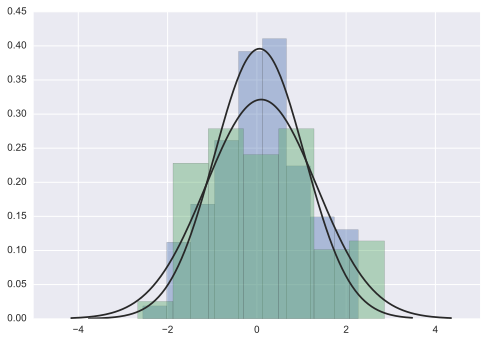

(1.0078822447165796, 1.2416003969261071)

In [188]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()
x1.std(), x2.std()

In [189]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.2534738372322662, pvalue=0.039170128783651344)

In [190]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.2248419904094572, pvalue=0.0071901501067483673)

In [191]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.6807089476794372, pvalue=0.0061135154970207925)

### Normality Test in SciPy

* Kolmogorov-Smirnov test
  * [`scipy.stats.ks_2samp`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)
* Shapiro–Wilk test
  * [`scipy.stats.shapiro`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) 
* Anderson–Darling test
  * [`scipy.stats.anderson`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)
* D'Agostino's K-squared test
  * [`scipy.stats.mstats.normaltest`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html)

### Normality Test in statsmodels

* Omnibus Normality test
  * [`statsmodels.stats.stattools.omni_normtest`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.omni_normtest.html)
* Jarque–Bera test
  * [`statsmodels.stats.stattools.jarque_bera`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.stattools.jarque_bera.html)
* Kolmogorov-Smirnov test
  * [`statsmodels.stats.diagnostic.kstest_normal`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.kstest_normal.html)
* Lilliefors test
  * [`statsmodels.stats.diagnostic.lillifors`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.diagnostic.lillifors.html)

># 4. Method of Moment

* Assume that the sample moment is same as the theoretical moment
* And obtain the parameters
* **1st Moment (Average)**
$$\mu = \text{E}[X] = \bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i $$
* **2nd Moment (Variance)**
$$\sigma^2 = \text{E}[(X-\mu)^2] = \bar{s}^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2 $$




### Bernoulli distribution

$$ \text{E}[X] = \theta = \dfrac{1}{N} \sum_{i=1}^N x_i  = \dfrac{N1}{N} $$

### Normal distribution

$$ \text{E}[X] = \mu = \dfrac{1}{N} \sum_{i=1}^N x_i  = \bar{x} $$

$$ \text{E}[(X-\mu)^2] = \sigma^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - \mu)^2 = s^2 $$

### Beta distribution

$$ \text{E}[X] = \dfrac{a}{a+b} = \bar{x}  $$

$$ \text{E}[(X-\mu)^2] = \dfrac{ab}{(a+b)^2(a+b+1)} = s^2 $$

$$ a = \bar{x} \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right) $$

$$ b = (1 - \bar{x}) \left( \frac{\bar{x} (1 - \bar{x})}{s^2} - 1 \right) $$

># 5. MLE method

* Most commonly used method of parameter estimation

### Likelihood

$$ \mathcal{L}(\theta;x) = f_X(x ; \theta)  = f_X(x \vert \theta) $$

* likelihood: function of $\theta$, with the given $x$

### MLE(Maximum Likelihood Estimation)
* Numerical optimization

$$ \hat\theta_{\text{MLE}} = \arg \max_{\theta} L(\theta; \{x_i\}) $$

* Log likelihood $\rightarrow$ transforms multiplication into summation $\rightarrow$ simplifies calculation

$$\mathcal{LL} = \log{\mathcal{L}}$$

### Example - Bernoulli distribution

$$ P(x ; \theta ) = \text{Bern}(x ; \theta ) = \theta^x (1 - \theta)^{1-x}$$

* Repetition for $N$ times $\rightarrow$ $x_{1:N}$

$$ L(\theta ; x_{1:N}) = P(x_{1:N};\theta) = \prod_{i=1}^N  \theta^{x_i} (1 - \theta)^{1-x_i} $$

* Log likelihood

$$ 
\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \big\{ {x_i} \log\theta + (1-x_i)\log(1 - \theta) \big\} \\
&=&  \sum_{i=1}^N {x_i} \log\theta +  \left( N-\sum_{i=1}^N x_i \right) \log( 1 - \theta ) \\
\end{eqnarray*}
$$

* Since $x = 1$(success) or $x = 0$ (failure)

$$ N_1 = \sum_{i=1}^N {x_i} $$
 
* Thus,

$$ 
\begin{eqnarray*}
\log L 
&=&  N_1 \log\theta  + (N-N_1) \log(1 - \theta) \\
\end{eqnarray*}
$$

* MLE

$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \theta} 
&=& \dfrac{\partial}{\partial \theta} \big\{ N_1 \log\theta  + (N-N_1) \log(1 - \theta)  \big\} = 0\\
&=& \dfrac{N_1}{\theta}  - \dfrac{N-N_1}{1-\theta} = 0 \\
\end{eqnarray*}
$$


$$
\dfrac{N_1}{\theta}  = \dfrac{N-N_1}{1-\theta}
$$


$$
\dfrac{1-\theta}{\theta} = \dfrac{N-N_1}{N_1} 
$$


$$
\dfrac{1}{\theta} - 1 = \dfrac{N}{N_1} - 1
$$


$$
\theta= \dfrac{N_1}{N}
$$

In [5]:
np.random.seed(0)
theta0 = 0.6
x = sp.stats.bernoulli(theta0).rvs(1000)
N0, N1 = np.bincount(x, minlength=2)
N = N0 + N1
theta = N1/N
theta

0.60999999999999999

### Example - Categorical distribution

$$ P(x ; \theta ) = \text{Cat}(x ; \theta) = \prod_{k=1}^K \theta_k^{x_k} $$

$$ \sum_{k=1}^K \theta_k = 1 $$

* Repetition for $N$ times $\rightarrow$ $x_{1:N}$

$$ L(\theta ; x_{1:N}) = P(x_{1:N};\theta) = \prod_{i=1}^N \prod_{k=1}^K \theta_k^{x_{i,k}} $$

* Log-likelihood

$$ 
\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \sum_{k=1}^K  \left( {x_{i,k}} \log\theta_k  \right) \\
&=& \sum_{k=1}^K  \sum_{i=1}^N  \left(  \log\theta_k  {x_{i,k}}\right) \\
&=& \sum_{k=1}^K \left( \log\theta_k \left( \sum_{i=1}^N {x_{i,k}}   \right)  \right)
\end{eqnarray*}
$$


* $N_k$: number of $x_k$

$$N_k = \sum_{i=1}^N {x_{i,k}}$$

$$ 
\begin{eqnarray*}
\log L 
&=& \sum_{k=1}^K \left( \log\theta_k  N_k  \right)
\end{eqnarray*}
$$

* With the following constraint

$$ \sum_{k=1}^K \theta_k = 1 $$

* Use Lagrange multiplier method

$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \theta_k} 
&=& \dfrac{\partial}{\partial \theta_k} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k\right)  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \lambda} 
&=& \dfrac{\partial}{\partial \lambda} \left\{ \sum_{k=1}^K \log\theta_k N_k  + \lambda \left(1- \sum_{k=1}^K \theta_k \right)  \right\} = 0\\
\end{eqnarray*}
$$

* MLE

$$
\dfrac{N_1}{\theta_1}  = \dfrac{N_2}{\theta_2} = \cdots = \dfrac{N_K}{\theta_K} = \lambda
$$


$$
\sum_{k=1}^K N_k = N  
$$


$$
\lambda \sum_{k=1}^K \theta_k  = \lambda = N
$$

$$
\theta_k = \dfrac{N_k}{N}
$$


In [6]:
np.random.seed(0)
theta0 = np.array([0.1, 0.3, 0.6])
x = np.random.choice(np.arange(3), 1000, p=theta0)
N0, N1, N2 = np.bincount(x, minlength=3)
N = N0 + N1 + N2
theta = np.array([N0, N1, N2]) / N
theta

array([ 0.098,  0.317,  0.585])

### Example - Normal distribution

$$ p(x ; \theta ) = N(x ; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$

* Repetition for $N$ time $\rightarrow$ $x_{1:N}$

$$ L(\theta;x_{1:N}) = p(x_{1:N};\theta) = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)$$

* Log-likelihood

$$ 
\begin{eqnarray*}
\log L 
&=& \log p(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \left\{ -\dfrac{1}{2}\log(2\pi\sigma^2) - \dfrac{(x_i-\mu)^2}{2\sigma^2} \right\} \\
&=& -\dfrac{N}{2} \log(2\pi\sigma^2) - \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2
\end{eqnarray*}
$$

* MLE

$$
\begin{eqnarray*}
\dfrac{\partial \log L}{\partial \mu} 
&=& \dfrac{\partial}{\partial \mu} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2  \right\} = 0 \\
\dfrac{\partial \log L}{\partial \sigma^2} 
&=& \dfrac{\partial}{\partial \sigma^2} \left\{ \dfrac{N}{2} \log(2\pi\sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2 \right\} = 0\\
\end{eqnarray*}
$$


$$
\dfrac{2}{2\sigma^2}\sum_{i=1}^N (x_i-\mu) = 0
$$

$$
N \mu = \sum_{i=1}^N x_i
$$

$$
\mu = \dfrac{1}{N}\sum_{i=1}^N x_i = \bar{x}
$$



$$
\dfrac{N}{2\sigma^2 } -  \dfrac{1}{2(\sigma^2)^2}\sum_{i=1}^N (x_i-\mu)^2  = 0
$$


$$
\sigma^2  =  \dfrac{1}{N}\sum_{i=1}^N (x_i-\mu)^2 = \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})^2 = s^2
$$


In [7]:
np.random.seed(0)
mu0 = 1
sigma0 = 2
x = sp.stats.norm(mu0, sigma0).rvs(1000)
xbar = x.mean()
s2 = x.std(ddof=1)
xbar, s2

(0.90948658501960922, 1.9750540913890255)

### Example - Multivariate Normal distribution

$$ p(x ; \theta ) = N(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) $$

* Repetition for $N$ times $\rightarrow$ $x_{1:N}$

$$ L(\theta;x_{1:N}) = p(x_{1:N};\theta) = \prod_{i=1}^N  \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\dfrac{1}{2} (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) \right)$$

* Log-likelihood

$$ 
\begin{eqnarray*}
\log L 
&=& \log P(x_{1:N};\theta)  \\
&=& \sum_{i=1}^N \left\{ -\log((2\pi)^{D/2} |\Sigma|^{1/2}) - \dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right\} \\
&=& C -\dfrac{N}{2} \log|\Sigma| - \dfrac{1}{2} \sum_i^N (x_i-\mu)^T \Sigma^{-1} (x_i-\mu) 
\end{eqnarray*}
$$

* For sake of simplicity,

 $$\Lambda = \Sigma^{-1}$$

$$ 
\begin{eqnarray*}
\log L 
&=& C + \dfrac{N}{2} \log|\Lambda| - \dfrac{1}{2} \sum_i^N(x_i-\mu)^T \Lambda (x_i-\mu) 
\end{eqnarray*}
$$

* MLE

$$ \dfrac{\partial L}{\partial \mu} = -  \dfrac{\partial}{\partial \mu}  \sum_{i=1}^N (x_i-\mu)^T \Lambda (x_i-\mu) =  - \sum_{i=1}^N 2\Lambda (x_i - \mu) = -2\Lambda \sum_{i=1}^N  (x_i - \mu) = 0 $$

$$ \dfrac{\partial L}{\partial \Lambda} = \dfrac{\partial}{\partial \Lambda} \dfrac{N}{2} \log|\Lambda| - \dfrac{\partial}{\partial \Lambda}  \dfrac{1}{2} \sum_{i=1}^N \text{tr}( (x_i-\mu)(x_i-\mu)^T\Lambda) =0  $$


$$ \sum_{i=1}^N  (x_i - \mu) = 0 $$

$$ \mu = \dfrac{1}{N}\sum_{i=1}^N x_i $$

$$ \dfrac{N}{2} \Lambda^{-T} = \dfrac{1}{2}\sum_{i=1}^N (x_i-\mu)(x_i-\mu)^T $$ 

$$ \Sigma = \dfrac{1}{N}\sum_{i=1}^N (x_i-\mu)(x_i-\mu)^T $$ 

In [8]:
np.random.seed(0)
mu0 = np.array([0, 1])
sigma0 = np.array([[1, 0.2], [0.2, 4]])
x = sp.stats.multivariate_normal(mu0, sigma0).rvs(1000)
xbar = x.mean(axis=0)
S2 = np.cov(x, rowvar=0)
print(xbar)
print(S2)

[-0.0126996   0.95720206]
[[ 0.96100921  0.16283508]
 [ 0.16283508  3.80507694]]
